In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
import math
from datetime import datetime
%matplotlib inline

In [2]:
data=pd.read_csv("applications data.csv")
data=pd.DataFrame(data)

In [3]:
data['date'] = data['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [4]:
pd.to_datetime("2012-10-01 12:35:53").weekday()

0

In [54]:
data.loc[data["ssn"]==999999999,'ssn'] = data.loc[data["ssn"]==999999999,'record']
data.loc[data["address"]=="123 MAIN ST",'address'] = data.loc[data["address"]=="123 MAIN ST",'record']
data.loc[data["dob"]==19070626,'dob'] = data.loc[data["dob"]==19070626,'record']
data.loc[data["homephone"]==9999999999,"homephone"] = data.loc[data["homephone"]==9999999999,'record']

In [22]:
data["nameDOB"]=data["firstname"]+data["lastname"]+data['dob'].apply(lambda x: str(x))

In [23]:
data["fulladdress"]=data["address"].apply(lambda x: str(x))+data['zip5'].apply(lambda x: str(x))

In [24]:
var=['ssn','firstname','lastname','address','homephone','zip5','dob','nameDOB','fulladdress']
comb=[]
for i in range(len(var)):
    for j in range(i+1,len(var)):
            comb.append([var[i],var[j]])
comb

[['ssn', 'firstname'],
 ['ssn', 'lastname'],
 ['ssn', 'address'],
 ['ssn', 'homephone'],
 ['ssn', 'zip5'],
 ['ssn', 'dob'],
 ['ssn', 'nameDOB'],
 ['ssn', 'fulladdress'],
 ['firstname', 'lastname'],
 ['firstname', 'address'],
 ['firstname', 'homephone'],
 ['firstname', 'zip5'],
 ['firstname', 'dob'],
 ['firstname', 'nameDOB'],
 ['firstname', 'fulladdress'],
 ['lastname', 'address'],
 ['lastname', 'homephone'],
 ['lastname', 'zip5'],
 ['lastname', 'dob'],
 ['lastname', 'nameDOB'],
 ['lastname', 'fulladdress'],
 ['address', 'homephone'],
 ['address', 'zip5'],
 ['address', 'dob'],
 ['address', 'nameDOB'],
 ['address', 'fulladdress'],
 ['homephone', 'zip5'],
 ['homephone', 'dob'],
 ['homephone', 'nameDOB'],
 ['homephone', 'fulladdress'],
 ['zip5', 'dob'],
 ['zip5', 'nameDOB'],
 ['zip5', 'fulladdress'],
 ['dob', 'nameDOB'],
 ['dob', 'fulladdress'],
 ['nameDOB', 'fulladdress']]

In [72]:
comb1=comb[26:30]
comb1

[['homephone', 'zip5'],
 ['homephone', 'dob'],
 ['homephone', 'nameDOB'],
 ['homephone', 'fulladdress']]

In [ ]:
data_sorted=data
for groupbyvar in ["ssn","fulladdress","nameDOB","homephone"]:
    data_sorted = data_sorted.sort_values(by = [groupbyvar, 'date'])
    data_sorted_index = data_sorted.set_index('date')
    for days in ['3d', '7d', '14d', '30d','60d']:
        data_sorted["num" + '_' + groupbyvar + "_" + days]=getattr(data_sorted_index.groupby(groupbyvar)['record'].rolling(days),"count")().values
        

In [ ]:
for groupbyvar in comb:
    data_sorted = data_sorted.sort_values(by = [groupbyvar[0],groupbyvar[1],'date'])
    data_sorted_index = data_sorted.set_index('date')
    for days in ['3d', '7d', '14d', '30d','60d']:
        data_sorted["num" + '_' + groupbyvar[0]+groupbyvar[1] + "_" + days]=getattr(data_sorted_index.groupby(groupbyvar)['record'].rolling(days),"count")().values

In [73]:
data_sorted=data
for groupbyvar in comb1:
    sortCols = groupbyvar[:]
    sortCols.append('date')
    data_sorted = data_sorted.sort_values(by = sortCols)
    if len(groupbyvar) == 1:
        data_sorted['Days_since_per_' + groupbyvar[0]] = data_sorted.groupby(groupbyvar)['date'].apply(lambda x: (x - x.shift(1)).astype('timedelta64[D]')).fillna(365).values
    else:
        data_sorted['Days_since_per' +groupbyvar[0]+groupbyvar[1]] = data_sorted.groupby(groupbyvar)['date'].apply(lambda x: (x-x.shift(1)).astype('timedelta64[D]')).fillna(365).values

In [77]:
phone=data_sorted
phone=phone.sort_values(by=["record"])
phone=phone.iloc[:,12:]

In [33]:
ssn=pd.read_csv("ssn.csv")
lastname=pd.read_csv("lastname.csv")
addr=pd.read_csv("address_days_since.csv")
ent=pd.read_csv("four entities.csv")
zip5=pd.read_csv("zip5_day_since.csv")

In [83]:
dob=pd.read_csv("dob.csv")
dob=dob.sort_values(by=["record"])
dob=dob.iloc[:,2:]

In [37]:
zip5=zip5.sort_values(by=["record"])
zip5=zip5.iloc[:,13:]
ent=ent.sort_values(by=["record"])
ent=ent.iloc[:,15:]
ssn=data_sorted.sort_values(by=["record"])
addr=addr.sort_values(by=["record"])
addr=addr.iloc[:,13:]
lastname=lastname.iloc[:,2:]

In [103]:
daysince=pd.concat([ssn,lastname,addr,ent,phone,dob,zip5],axis=1)

In [36]:
newcol = pd.Index(newdata.columns.str.contains("week",regex=False))
newcol

Index([False, False, False, False, False, False, False, False, False, False,
       ...
       False, False, False, False, False, False, False, False, False, False],
      dtype='object', length=345)

In [47]:
pd.Index(newdata.columns).apply(lambda x:x.str_contains("risk"))

import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
import math
from datetime import datetime
%matplotlib inline
newdata=pd.read_csv("finaldata.csv")
newdata.head()
newdata.columns
len(newdata.columns)
newdata.head()
newdata.columns.str_contains("risk")
list(newdata.columns).str_contains("risk")
list(newdata.columns).apply(x: x.str_contains("risk"))
list(newdata.columns).apply(x:x.str_contains("risk"))
aaa=list(newdata.columns).
aaa.apply(x:x.str_contains("risk"))
aaa=list(newdata.columns)
aaa.apply(x:x.str_contains("risk"))
aaa=list(newdata.columns)
aaa.apply(lambda x:x.str_contains("risk"))
aaa=pd.Series(newdata.columns)
aaa.apply(lambda x:x.str_contains("risk"))

newdata.index.apply(lambda x:x.str_contains("risk"))
newdata.Index.apply(lambda x:x.str_contains("risk"))
pd.Index(newdata.columns).apply(lambda x:x.str_contains("risk"))
newdata.index
newdata.columns
n

In [ ]:
df_merge=pd.read_csv("df_merged.csv")
df_merge=df_merge.iloc[:,1:]

In [122]:
len(df_merge)

1000000

In [110]:
#daysince.to_csv("daysince.csv")
ds=daysince.iloc[:,12:]

In [111]:
#ds["fraud_label"]=daysince["fraud_label"]
newdata=pd.concat([df_merge,ds],axis=1)

In [8]:
newdata=pd.read_csv("finaldata.csv")

In [9]:
newdata.head()

,Unnamed: 0,record,ssn_0,ssn_1,ssn_3,ssn_7,ssn_14,ssn_30,namedob_0,namedob_1,...,Days_since_perhomephonezip5,Days_since_perhomephonedob,Days_since_perhomephonenameDOB,Days_since_perhomephonefulladdress,Danamedob_since_perdobnamedob,Dafulladdress_since_perdobfulladdress,Dafulladdress_since_pernamedobfulladdress,Days_since_per_zip5_dob,Days_since_per_zip5_nameDOB,Days_since_per_zip5_fulladdress
0,0,1,0,0,0,0,0,0,0,0,...,365.0,365.0,365.0,365.0,365,365,365,365.0,365.0,365.0
1,1,2,0,0,0,0,0,0,0,0,...,365.0,365.0,365.0,365.0,365,365,365,365.0,365.0,365.0
2,2,3,0,0,0,0,0,0,0,0,...,365.0,365.0,365.0,365.0,365,365,365,365.0,365.0,365.0
3,3,4,0,0,0,0,0,0,0,0,...,365.0,365.0,365.0,365.0,365,365,365,365.0,365.0,365.0
4,4,5,0,0,0,0,0,0,0,0,...,365.0,365.0,365.0,365.0,365,365,365,365.0,365.0,365.0


In [14]:
newcol = pd.Index(newdata.columns.str.contains("risk"))

In [15]:
zip_wd=pd.read_csv("selection.csv")
zip_wd=zip_wd.drop(["Unnamed: 0","record"],axis=1)

In [16]:
a= newdata[['weekday_risk',"weekday"]]

In [17]:
risk_table = pd.DataFrame(newdata[['weekday','weekday_risk']].groupby('weekday')['weekday_risk'].mean())

In [18]:
col=newdata.loc[:,newcol].columns
c=[]
for i in col:
    c.append(i)

In [19]:
newdata = newdata.drop(c,axis=1)

In [20]:
newdata.shape

(1000000, 280)

In [21]:
newdata["zip3_risk"]=zip_wd["zip3_risk"]
newdata["weekday_risk"]=zip_wd["weekday_risk"]
newdata=newdata.drop(["Unnamed: 0","record"],axis=1)

In [156]:
var=pd.read_csv("var.csv")

In [157]:
hhdata=newdata.iloc[:,242:]
newdata=pd.concat([hhdata,var],axis=1)
newdata=newdata.drop(["Unnamed: 0","record"],axis=1)

In [164]:
newdata["date"]=app["date"]

# ks

In [166]:
ks=newdata
ks=ks[ks.date<"2016-11-01"] # get traing+testing data before 11/01/2016
ks['rv']=np.random.randn(len(ks['date'])) # add random column
good_ks=ks.loc[ks.fraud_label==0,:]
bad_ks=ks.loc[ks.fraud_label==1,:]
var_name=ks.columns.values
ks_dic={}
for i in var_name:
    ks_dic[i]=sps.ks_2samp(good_ks[i],bad_ks[i])[0]  # get ks score

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# fdr

In [167]:
n=len(ks['date'])
f_num=len(newdata.loc[newdata.fraud_label==1,:])
fdr={}
for i in var_name:
    f=ks.sort_values(by=i,ascending=False)
    f1=f.iloc[:int(0.03*n),]
    f2=f.iloc[int(0.97*n):,]
    f1_fdr=np.mean(f1.fraud_label)*int(0.03*n)/f_num
    f2_fdr=np.mean(f2.fraud_label)*int(0.03*n)/f_num
    f_score=max(f1_fdr,f2_fdr)
    fdr[i]=f_score

# Build ks and fdr table

In [168]:
kstable=pd.Series(ks_dic).sort_values(ascending=False)
kstable=pd.DataFrame(kstable).reset_index()

fdrtable=pd.Series(fdr).sort_values(ascending=False)
fdrtable=pd.DataFrame(fdrtable).reset_index()

kstable.columns=["variable","ks"]
fdrtable.columns=["variable","fdr"]

ks_fdr=kstable.merge(fdrtable,on="variable", how='left')

ks_rank=pd.DataFrame.rank(ks_fdr['ks'],ascending=False)
fdr_rank=pd.DataFrame.rank(ks_fdr['fdr'],ascending=False)

ks_fdr['ks rank']=pd.Series(ks_rank)
ks_fdr['fdr rank']=pd.Series(fdr_rank)

In [169]:
ks_fdr["avg rank"]=(ks_fdr["ks rank"]+ks_fdr["fdr rank"])/2
var=ks_fdr[ks_fdr["avg rank"]<=130]# select top 110 variables by average rank of ks and fdr


In [203]:
ks_fdr.to_csv("ksfdrtable.csv")

In [170]:
app=newdata[var["variable"].values]
app["date"]=newdata["date"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [186]:
app.to_csv("app.csv")

In [180]:
norm_data=app
#seperate into training+testing and validation
train_test=norm_data[norm_data.date<"2016-11-01"]
oot=norm_data[norm_data.date>="2016-11-01"]
train_test=train_test.drop(["date"],axis=1)
oot=oot.drop(["date"],axis=1)

#seperate into training and testing
from sklearn.model_selection import train_test_split
train_test_no_fraud=train_test.drop(["fraud_label"],axis=1)
predictors=train_test_no_fraud
target=train_test["fraud_label"]
X_train, X_test, y_train, y_test = train_test_split(predictors,target, test_size=0.3)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (583454, 130) (583454,)
Testing dataset shape: (250053, 130) (250053,)


In [183]:
X_train=X_train.fillna(365)

In [184]:
oot.isna().sum()

fraud_label                      0
fulladdress_30                   0
zip5fulladdress_30               0
addressfulladdress_30            0
addresszip5_30                   0
zip5fulladdress_14               0
fulladdress_14                   0
addresszip5_14                   0
addressfulladdress_14            0
zip5fulladdress_7                0
addressfulladdress_7             0
addresszip5_7                    0
fulladdress_7                    0
fulladdress_3                    0
zip5fulladdress_3                0
addressfulladdress_3             0
addresszip5_3                    0
zip5fulladdress_1                0
fulladdress_1                    0
addresszip5_1                    0
addressfulladdress_1             0
zip3_risk                        1
Days_since_perssndob             0
ssndob_30                        0
lastnamedob_30                   0
Danamedob_since_perdobnamedob    0
addresshomephone_30              0
firstnamenamedob_30              0
namedob_30          

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LogisticRegression(solver='lbfgs'),n_features_to_select=20)
rfe_selector.fit(X_train, y_train)
forward_selected_var=X_train.columns[rfe_selector.get_support()]
forward_selected_var

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Index(['zip5fulladdress_30', 'addressfulladdress_30', 'addresszip5_30',
       'zip3_risk', 'addresshomephone_30', 'firstnamenamedob_30', 'namedob_30',
       'dobnamedob_30', 'lastnamenamedob_30', 'firstnamedob_30',
       'homephonefulladdress_30', 'addresshomephone_14',
       'homephonefulladdress_14', 'firstnamedob_14', 'ssndob_14',
       'ssnnamedob_14', 'fulladdress_0', 'zip5fulladdress_0', 'homephone_1',
       'lastnamedob_3'],
      dtype='object')

In [187]:
X_train=X_train[forward_selected_var]
X_test=X_test[forward_selected_var]
X_valid=oot[forward_selected_var]
y_valid=oot["fraud_label"]

In [188]:
X_valid["zip3_risk"]=X_valid["zip3_risk"].fillna("0")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


FRD for training is 36.367952522255194%
FRD for testing is 37.68844221105528%
FRD for validation is 36.08549874266555%


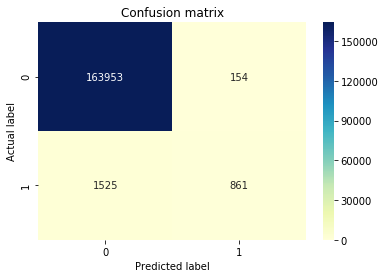

In [189]:
from sklearn import metrics

logreg=LogisticRegression(solver='lbfgs',multi_class="ovr")
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
y_pred_valid = logreg.predict(X_valid)


#confusion matrix
cnf_matrix_train=metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix_test=metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix_valid=metrics.confusion_matrix(y_valid, y_pred_valid)
#metrics.accuracy_score(y_test,y_pred)

#Plot confusion matrix for testing
class_names=[0,1] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_valid), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(f"FRD for training is {(cnf_matrix_train[1][1]/(cnf_matrix_train[1][0]+cnf_matrix_train[1][1]))*100}%")
print(f"FRD for testing is {(cnf_matrix_test[1][1]/(cnf_matrix_test[1][0]+cnf_matrix_test[1][1]))*100}%")
print(f"FRD for validation is {(cnf_matrix_valid[1][1]/(cnf_matrix_valid[1][0]+cnf_matrix_valid[1][1]))*100}%")

In [150]:
len(X_train)*0.03

15003.119999999999

In [190]:
# calculate predictions
predictions_train = logreg.predict_proba(X_train)
# combine the result to the original dataset in order to calculate the FDR
df_train_pre = pd.DataFrame(predictions_train)
train = pd.concat([X_train,y_train],axis = 1).reset_index()
train['prediction_scor'] = df_train_pre.iloc[:,1]
train_fdr_top = train.sort_values('prediction_scor', ascending = False).head(int(len(X_train)*0.03))
train_fdr = train_fdr_top["fraud_label"].sum()/train.fraud_label.sum()
train_fdr

0.5087240356083086

In [476]:
len(X_test)*0.03

10002.09

In [191]:
# calculate predictions
predictions_test = logreg.predict_proba(X_test)
# combine the result to the original dataset in order to calculate the FDR
df_test_pre = pd.DataFrame(predictions_test) 
test = pd.concat([X_test,y_test],axis = 1).reset_index()
test['prediction_scor'] = df_test_pre.iloc[:,1]
test_fdr_top = test.sort_values('prediction_scor', ascending = False).head(int(len(X_test)*0.03))
test_fdr = test_fdr_top['fraud_label'].sum()/test.fraud_label.sum()
test_fdr

0.5223338916806254

In [478]:
len(X_valid)*0.03

4994.79

In [192]:
# calculate predictions
predictions_valid = logreg.predict_proba(X_valid)
# combine the result to the original dataset in order to calculate the FDR
df_valid_pre = pd.DataFrame(predictions_valid) 
valid = pd.concat([X_valid,y_valid],axis = 1).reset_index()
valid['prediction_scor'] = df_valid_pre.iloc[:,1]
valid_fdr_top = valid.sort_values('prediction_scor', ascending = False).head(int(len(X_valid)*0.03))
valid_fdr = valid_fdr_top['fraud_label'].sum()/valid.fraud_label.sum()
valid_fdr

0.49161777032690696

In [227]:
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(random_state=0,n_estimators = 500, max_depth=10,max_features=4)
rand_for.fit(X_train, y_train)
y_pred_train = rand_for.predict(X_train)
y_pred_test = rand_for.predict(X_test)
y_pred_valid = rand_for.predict(X_valid)

#confusion matrix
cnf_matrix_train=metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix_test=metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix_valid=metrics.confusion_matrix(y_valid, y_pred_valid)

print(f"FRD for training is {(cnf_matrix_train[1][1]/(cnf_matrix_train[1][0]+cnf_matrix_train[1][1]))*100}%")
print(f"FRD for testing is {(cnf_matrix_test[1][1]/(cnf_matrix_test[1][0]+cnf_matrix_test[1][1]))*100}%")
print(f"FRD for validation is {(cnf_matrix_valid[1][1]/(cnf_matrix_valid[1][0]+cnf_matrix_valid[1][1]))*100}%")

FRD for training is 48.154302670623146%
FRD for testing is 48.213288665549975%
FRD for validation is 44.04861693210394%


In [228]:
# calculate predictions
predictions_train = rand_for.predict_proba(X_train)
# combine the result to the original dataset in order to calculate the FDR
df_train_pre = pd.DataFrame(predictions_train)
train = pd.concat([X_train,y_train],axis = 1).reset_index()
train['prediction_scor'] = df_train_pre.iloc[:,1]
train_fdr_top = train.sort_values('prediction_scor', ascending = False).head(int(len(X_train)*0.03))
train_fdr = train_fdr_top["fraud_label"].sum()/train.fraud_label.sum()
train_fdr

0.5575074183976261

In [229]:
# calculate predictions
predictions_test = rand_for.predict_proba(X_test)
# combine the result to the original dataset in order to calculate the FDR
df_test_pre = pd.DataFrame(predictions_test) 
test = pd.concat([X_test,y_test],axis = 1).reset_index()
test['prediction_scor'] = df_test_pre.iloc[:,1]
test_fdr_top = test.sort_values('prediction_scor', ascending = False).head(int(len(X_test)*0.03))
test_fdr = test_fdr_top['fraud_label'].sum()/test.fraud_label.sum()
test_fdr

0.5639307649357901

In [230]:
# calculate predictions
predictions_valid = rand_for.predict_proba(X_valid)
# combine the result to the original dataset in order to calculate the FDR
df_valid_pre = pd.DataFrame(predictions_valid) 
valid = pd.concat([X_valid,y_valid],axis = 1).reset_index()
valid['prediction_scor'] = df_valid_pre.iloc[:,1]
valid_fdr_top = valid.sort_values('prediction_scor', ascending = False).head(int(len(X_valid)*0.03))
valid_fdr = valid_fdr_top['fraud_label'].sum()/valid.fraud_label.sum()
valid_fdr

0.5318524727577536

In [223]:
from sklearn.ensemble import GradientBoostingClassifier
boosted_tree=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0).fit(X_train, y_train)
y_pred_train = boosted_tree.predict(X_train)
y_pred_test = boosted_tree.predict(X_test)
y_pred_valid = boosted_tree.predict(X_valid)

#confusion matrix
cnf_matrix_train=metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix_test=metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix_valid=metrics.confusion_matrix(y_valid, y_pred_valid)

print(f"FRD for training is {(cnf_matrix_train[1][1]/(cnf_matrix_train[1][0]+cnf_matrix_train[1][1]))*100}%")
print(f"FRD for testing is {(cnf_matrix_test[1][1]/(cnf_matrix_test[1][0]+cnf_matrix_test[1][1]))*100}%")
print(f"FRD for validation is {(cnf_matrix_valid[1][1]/(cnf_matrix_valid[1][0]+cnf_matrix_valid[1][1]))*100}%")

FRD for training is 48.10682492581602%
FRD for testing is 48.96705750977108%
FRD for validation is 43.46186085498743%


In [224]:
# calculate predictions
predictions_train = boosted_tree.predict_proba(X_train)
# combine the result to the original dataset in order to calculate the FDR
df_train_pre = pd.DataFrame(predictions_train)
train = pd.concat([X_train,y_train],axis = 1).reset_index()
train['prediction_scor'] = df_train_pre.iloc[:,1]
train_fdr_top = train.sort_values('prediction_scor', ascending = False).head(int(len(X_train)*0.03))
train_fdr = train_fdr_top["fraud_label"].sum()/train.fraud_label.sum()
train_fdr

0.5525222551928783

In [225]:
predictions_test = boosted_tree.predict_proba(X_test)
# combine the result to the original dataset in order to calculate the FDR
df_test_pre = pd.DataFrame(predictions_test) 
test = pd.concat([X_test,y_test],axis = 1).reset_index()
test['prediction_scor'] = df_test_pre.iloc[:,1]
test_fdr_top = test.sort_values('prediction_scor', ascending = False).head(int(len(X_test)*0.03))
test_fdr = test_fdr_top['fraud_label'].sum()/test.fraud_label.sum()
test_fdr

0.5614182021217197

In [226]:
# calculate predictions
predictions_valid =boosted_tree.predict_proba(X_valid)
# combine the result to the original dataset in order to calculate the FDR
df_valid_pre = pd.DataFrame(predictions_valid) 
valid = pd.concat([X_valid,y_valid],axis = 1).reset_index()
valid['prediction_scor'] = df_valid_pre.iloc[:,1]
valid_fdr_top = valid.sort_values('prediction_scor', ascending = False).head(int(len(X_valid)*0.03))
valid_fdr = valid_fdr_top['fraud_label'].sum()/valid.fraud_label.sum()
valid_fdr

0.5280804694048616

In [202]:
feature_importances = pd.DataFrame(rand_for.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances


,importance
addresszip5_30,0.146495
addressfulladdress_30,0.128355
zip5fulladdress_30,0.122596
dobnamedob_30,0.070441
firstnamenamedob_30,0.065746
lastnamenamedob_30,0.062341
namedob_30,0.061722
ssndob_14,0.040636
ssnnamedob_14,0.040266
addresshomephone_30,0.038054


In [257]:
phone599=data[data.homephone ==5995186929]
rec=phone599["record"]
#Phone = 5995186929
app["record"]=data["record"]
p599=app[app.record.isin(rec)]
p5=p599[forward_selected_var]

In [259]:
p599["fs"]=model.predict(p5)
p599=p599[["date","fs","fraud_label"]]
p599['date'] = p599['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
p599["month"]=p599['date'].apply(lambda x:x.month)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


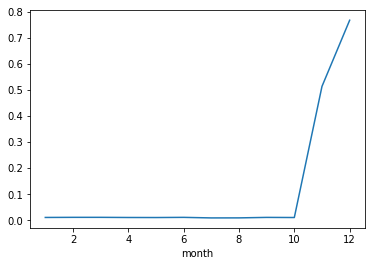

In [276]:
p599=p599.reset_index()
p599.groupby(by='month')['fs'].apply(lambda x: x.mean()).plot.line()

In [293]:
fs_month=pd.DataFrame(p599.groupby(by='month')['fs'].apply(lambda x: x.mean())).reset_index()
fl_month=pd.DataFrame(p599.groupby(by='month')['fraud_label'].apply(lambda x: x.mean())).reset_index()

In [291]:
fs_month_count=pd.DataFrame(p599.groupby(by='month')['fs'].apply(lambda x: x.count())).reset_index()

([<matplotlib.axis.XTick at 0x1a6dea3208>,
 <a list of 12 Text xticklabel objects>)

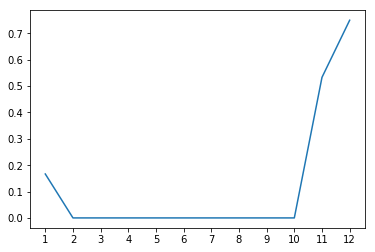

In [295]:
plt.plot(fl_month["month"],fl_month["fraud_label"])
plt.xticks(fl_month["month"])

In [208]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from numpy.random import seed
# set seed
seed(1)
model = Sequential()
model.add(Dense(20, input_dim=20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
# Fit the model
keras.optimizers.SGD(lr=0.15, momentum=0.0, decay=0.0, nesterov=False)
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=5, verbose=2)

Train on 583454 samples, validate on 250053 samples
Epoch 1/10
 - 140s - loss: 0.0469 - acc: 0.9909 - val_loss: 0.0439 - val_acc: 0.9911
Epoch 2/10
 - 144s - loss: 0.0457 - acc: 0.9910 - val_loss: 0.0443 - val_acc: 0.9914
Epoch 3/10
 - 136s - loss: 0.0458 - acc: 0.9910 - val_loss: 0.0437 - val_acc: 0.9913
Epoch 4/10
 - 135s - loss: 0.0456 - acc: 0.9911 - val_loss: 0.0444 - val_acc: 0.9915
Epoch 5/10
 - 142s - loss: 0.0456 - acc: 0.9910 - val_loss: 0.0441 - val_acc: 0.9909
Epoch 6/10
 - 136s - loss: 0.0456 - acc: 0.9910 - val_loss: 0.0448 - val_acc: 0.9908
Epoch 7/10
 - 132s - loss: 0.0454 - acc: 0.9910 - val_loss: 0.0440 - val_acc: 0.9912
Epoch 8/10
 - 140s - loss: 0.0454 - acc: 0.9910 - val_loss: 0.0438 - val_acc: 0.9911
Epoch 9/10
 - 138s - loss: 0.0452 - acc: 0.9911 - val_loss: 0.0445 - val_acc: 0.9912
Epoch 10/10
 - 148s - loss: 0.0452 - acc: 0.9912 - val_loss: 0.0444 - val_acc: 0.9913


In [232]:
# calculate predictions
predictions_train = model.predict(X_train)
# combine the result to the original dataset in order to calculate the FDR
df_train_pre = pd.DataFrame(predictions_train) 
train = pd.concat([X_train,y_train],axis = 1).reset_index()
train['prediction_scor'] = df_train_pre
train_fdr_top = train.sort_values('prediction_scor', ascending = False).head(int(len(X_train)*0.03))
train_fdr = train_fdr_top["fraud_label"].sum()/train.fraud_label.sum()
train_fdr

0.5487240356083086

In [233]:
# calculate predictions
predictions_test = model.predict(X_test)
# combine the result to the original dataset in order to calculate the FDR
df_test_pre = pd.DataFrame(predictions_test) 
test = pd.concat([X_test,y_test],axis = 1).reset_index()
test['prediction_scor'] = df_test_pre
test_fdr_top = test.sort_values('prediction_scor', ascending = False).head(int(len(X_test)*0.03))
test_fdr = test_fdr_top['fraud_label'].sum()/test.fraud_label.sum()
test_fdr

0.5589056393076494

In [231]:
# calculate predictions
predictions_valid = model.predict(X_valid)
# combine the result to the original dataset in order to calculate the FDR
df_valid_pre = pd.DataFrame(predictions_valid) 
valid = pd.concat([X_valid,y_valid],axis = 1).reset_index()
valid['prediction_scor'] = df_valid_pre
valid_fdr_top = valid.sort_values('prediction_scor', ascending = False).head(int(len(X_valid)*0.03))
valid_fdr = valid_fdr_top['fraud_label'].sum()/valid.fraud_label.sum()
valid_fdr

0.5331098072087175

In [255]:
sum(test["fraud_label"])

3582

In [254]:
len(test)

250053

In [245]:
traintable  = pd.DataFrame()
traintable['Population Bin #'] = range(1,21)
traintable['Total # Records'] = int(train.shape[0]*0.01)
traintable['# Bads'] = range(1,21)
for i in range(20):
    traintable['# Bads'][i] = train.sort_values('prediction_scor', ascending = False)['fraud_label'][i*5834:i*5834+5834].sum()
traintable['# Goods'] = traintable['Total # Records'] - traintable['# Bads']
traintable['% Goods'] = traintable['# Goods'] /traintable['Total # Records']*100
traintable['% Bads'] = traintable['# Bads'] /traintable['Total # Records']*100
traintable['Cumulative Bad'] = range(20)
for i in range(20):
    traintable['Cumulative Bad'][i]  = traintable['# Bads'][:i+1].sum()
traintable['Cumulative Good'] = range(20)
for i in range(20):
    traintable['Cumulative Good'][i]  = traintable['# Goods'][:i+1].sum()
traintable['% Bad (FDR)'] = traintable['Cumulative Bad'] /train['fraud_label'].sum()*100
traintable['% Good'] = traintable['Cumulative Good'] /(train.shape[0]-train['fraud_label'].sum())*100
traintable['KS'] = traintable['% Bad (FDR)']-traintable['% Good'] 
traintable['FPR'] = traintable['Cumulative Good'] /traintable['Cumulative Bad']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [246]:
traintable.to_csv("traintable.csv")

In [247]:
testtable  = pd.DataFrame()
testtable['Population Bin #'] = range(1,21)
testtable['Total # Records'] = int(test.shape[0]*0.01)
testtable['# Bads'] = range(1,21)
for i in range(20):
    testtable['# Bads'][i] = test.sort_values('prediction_scor', ascending = False)['fraud_label'][i*2500:i*2500+2500].sum()
testtable['# Goods'] = testtable['Total # Records'] - testtable['# Bads']
testtable['% Goods'] = testtable['# Goods'] /testtable['Total # Records']*100
testtable['% Bads'] = testtable['# Bads'] /testtable['Total # Records']*100
testtable['Cumulative Bad'] = range(20)
for i in range(20):
    testtable['Cumulative Bad'][i]  = testtable['# Bads'][:i+1].sum()
testtable['Cumulative Good'] = range(20)
for i in range(20):
    testtable['Cumulative Good'][i]  = testtable['# Goods'][:i+1].sum()
testtable['% Bad (FDR)'] = testtable['Cumulative Bad'] /test['fraud_label'].sum()*100
testtable['% Good'] = testtable['Cumulative Good'] /(test.shape[0]-test['fraud_label'].sum())*100
testtable['KS'] = testtable['% Bad (FDR)']-testtable['% Good'] 
testtable['FPR'] = testtable['Cumulative Good'] /testtable['Cumulative Bad']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [248]:
testtable.to_csv("testtable.csv")

In [296]:
len(valid)*0.01

1664.93

In [297]:
oottable  = pd.DataFrame()
oottable['Population Bin #'] = range(1,21)
oottable['Total # Records'] = int(valid.shape[0]*0.01)
oottable['# Bads'] = range(1,21)
for i in range(20):
    oottable['# Bads'][i] = valid.sort_values('prediction_scor', ascending = False)['fraud_label'][i*1664:i*1664+1664].sum()
oottable['# Goods'] = oottable['Total # Records'] - oottable['# Bads']
oottable['% Goods'] = oottable['# Goods'] /oottable['Total # Records']*100
oottable['% Bads'] = oottable['# Bads'] /oottable['Total # Records']*100
oottable['Cumulative Bad'] = range(20)
for i in range(20):
    oottable['Cumulative Bad'][i]  = oottable['# Bads'][:i+1].sum()
oottable['Cumulative Good'] = range(20)
for i in range(20):
    oottable['Cumulative Good'][i]  = oottable['# Goods'][:i+1].sum()
oottable['% Bad (FDR)'] = oottable['Cumulative Bad'] /valid['fraud_label'].sum()*100
oottable['% Good'] = oottable['Cumulative Good'] /(valid.shape[0]-valid['fraud_label'].sum())*100
oottable['KS'] = oottable['% Bad (FDR)']-oottable['% Good'] 
oottable['FPR'] = oottable['Cumulative Good'] /oottable['Cumulative Bad']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [298]:
oottable.to_csv("oottable.csv")

In [312]:
sum(valid["fraud_label"])

2386

In [212]:
pre = pd.DataFrame(predictions_valid,columns=['pro'])

In [213]:
pre['ac'] = valid['fraud_label']

In [214]:
pre = pre.sort_values(by="pro",ascending=False)

In [215]:
pre = pre.reset_index()

In [216]:
pre['pre']=pre['pro']
pre['pre'] = pre['pre']>pre['pre'].median()

In [217]:
pre['pred']=pre['pre'].apply(lambda x : int(x))

In [221]:
pre['money']=pre['pre']

In [222]:
pre.to_csv("pre.csv")

In [220]:
for i in range(len(pre)):
    if pre.loc[i,"pred"]==1:
        if pre.loc[i,'ac']==1:
            pre.loc[i,"money"]=6000
        else:
            pre.loc[i,'money']=-50
    else:
        pre.loc[i,'money']=0

KeyboardInterrupt: 